In [49]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the Iris dataset
iris = load_iris()

# Put features into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species (target) as a readable column 
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Quick check of the dataset
print("Shape of dataset:", df.shape)  # should be (150, 5)
print(df.head())


Shape of dataset: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [51]:
# Task 1: Discretize sepal_length into 3 categories (short, medium, long)

# Using pd.cut to split sepal length into 3 equal-width bins
df['sepal_length_cat'] = pd.cut(
    df['sepal length (cm)'], 
    bins=3, 
    labels=['short', 'medium', 'long']
)

# Show first 10 rows with new category
print("First 10 rows with discretized sepal_length:")
print(df[['sepal length (cm)', 'sepal_length_cat']].head(10))

# Show category counts
print("\nCategory counts for sepal_length:")
print(df['sepal_length_cat'].value_counts())


First 10 rows with discretized sepal_length:
   sepal length (cm) sepal_length_cat
0                5.1            short
1                4.9            short
2                4.7            short
3                4.6            short
4                5.0            short
5                5.4            short
6                4.6            short
7                5.0            short
8                4.4            short
9                4.9            short

Category counts for sepal_length:
sepal_length_cat
medium    71
short     59
long      20
Name: count, dtype: int64


In [53]:
# Task 2: Binarize sepal_width at threshold = 3.0
# Rule: if sepal_width > 3 → 1, else → 0

df['sepal_width_bin'] = (df['sepal width (cm)'] > 3.0).astype(int)

# Show first 10 rows with binarized values
print("Binarized sepal_width (first 10 rows):")
print(df[['sepal width (cm)', 'sepal_width_bin']].head(10))


Binarized sepal_width (first 10 rows):
   sepal width (cm)  sepal_width_bin
0               3.5                1
1               3.0                0
2               3.2                1
3               3.1                1
4               3.6                1
5               3.9                1
6               3.4                1
7               3.4                1
8               2.9                0
9               3.1                1


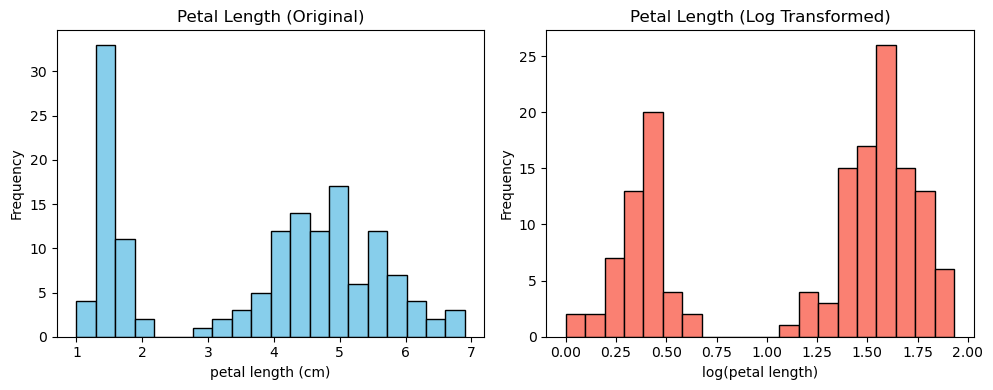

In [55]:
# Task 3: Apply log transformation to petal_length
# Create a new column for log-transformed values
df['petal_length_log'] = np.log(df['petal length (cm)'])
# Plot histograms before and after log transformation
plt.figure(figsize=(10, 4))

# Before log transform
plt.subplot(1, 2, 1)
plt.hist(df['petal length (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title("Petal Length (Original)")
plt.xlabel("petal length (cm)")
plt.ylabel("Frequency")

# After log transform
plt.subplot(1, 2, 2)
plt.hist(df['petal_length_log'], bins=20, color='salmon', edgecolor='black')
plt.title("Petal Length (Log Transformed)")
plt.xlabel("log(petal length)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [57]:
# Final check: show dataset with new columns
print("Final dataset with new columns added:")
print(df.head())


Final dataset with new columns added:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species sepal_length_cat  sepal_width_bin  petal_length_log  
0  setosa            short                1          0.336472  
1  setosa            short                0          0.336472  
2  setosa            short                1          0.262364  
3  setosa            short                1          0.405465  
4  setosa            short                1          0.336472  
